## Jeremy Tan
## Dendrogram Code

In [1]:
import pandas as pd
import numpy as np

In [2]:
X = [1,2,3,4,7]
Y = [4,4,2,1,1]


In [3]:
df = pd.DataFrame({'X': X, 'Y': Y})

In [4]:
df

# The labels are: 0 - A, 1 - B, 2 - C, 3 - D, 4 - E.

,X,Y
0,1,4
1,2,4
2,3,2
3,4,1
4,7,1


The labels are: 0 - A, 1 - B, 2 - C, 3 - D, 4 - E.

### Single Linkage

In [5]:
from sklearn.cluster import AgglomerativeClustering

# linkage may be (single, complete, average)
# modify threshold in dendrogram below
single_model = AgglomerativeClustering(metric="euclidean", linkage="single", compute_distances=True)
single_model.fit(df)

AgglomerativeClustering(compute_distances=True, linkage='single')

In [6]:
single_model.distances_

array([1.        , 1.41421356, 2.23606798, 3.        ])

In [7]:
single_model.labels_

array([0, 0, 0, 0, 1], dtype=int64)

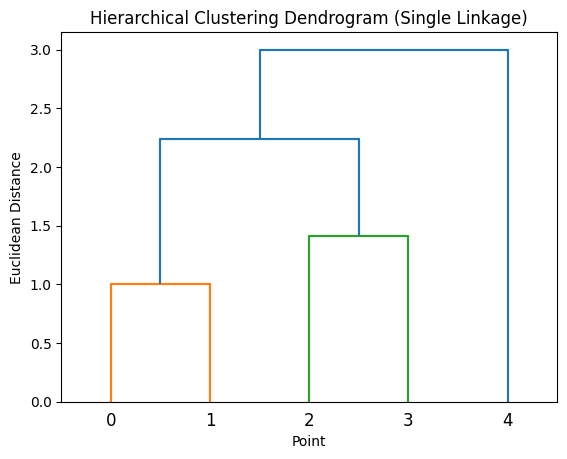

In [8]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

plot_dendrogram(single_model)
plt.title("Hierarchical Clustering Dendrogram (Single Linkage)")
plot_dendrogram(single_model, truncate_mode="level", p=3)
plt.xlabel("Point")
plt.ylabel("Euclidean Distance")
plt.show()

This matches what I got in excel. If k = 2, the clusters are {A,B,C,D} and {E}.

### Complete Linkage

In [9]:
from sklearn.cluster import AgglomerativeClustering

complete_model = AgglomerativeClustering(metric="euclidean", linkage="complete", compute_distances=True)
complete_model.fit(df)

AgglomerativeClustering(compute_distances=True, linkage='complete')

In [10]:
complete_model.distances_

array([1.        , 1.41421356, 4.12310563, 6.70820393])

In [11]:
complete_model.labels_

array([1, 1, 0, 0, 0], dtype=int64)

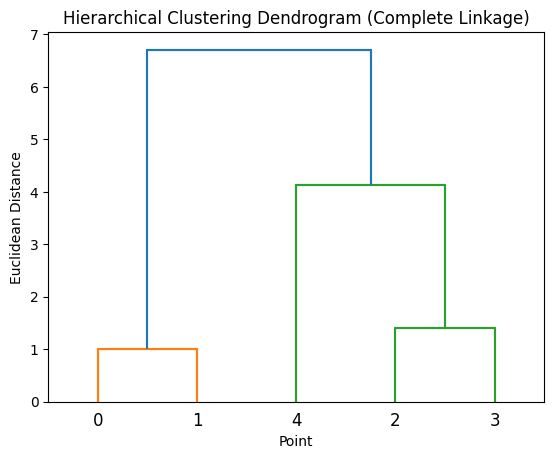

In [12]:
plot_dendrogram(complete_model)
plt.title("Hierarchical Clustering Dendrogram (Complete Linkage)")
plot_dendrogram(complete_model, truncate_mode="level", p=3)
plt.xlabel("Point")
plt.ylabel("Euclidean Distance")
plt.show()

This matches the Excel sheet, when k = 2, the clusters are {A,B} and {C,D,E}.